In [1]:
from keras.layers import Input, Dense
from keras.models import Model


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)



In [4]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/5
47/47 [==============================] - 1s 12ms/step - loss: 0.5560 - accuracy: 0.0022 - val_loss: 0.4588 - val_accuracy: 0.0030
Epoch 2/5
47/47 [==============================] - 0s 8ms/step - loss: 0.4206 - accuracy: 0.0083 - val_loss: 0.3978 - val_accuracy: 0.0160
Epoch 3/5
47/47 [==============================] - 0s 8ms/step - loss: 0.3825 - accuracy: 0.0123 - val_loss: 0.3737 - val_accuracy: 0.0130
Epoch 4/5
47/47 [==============================] - 0s 8ms/step - loss: 0.3622 - accuracy: 0.0088 - val_loss: 0.3576 - val_accuracy: 0.0100
Epoch 5/5
47/47 [==============================] - 0s 8ms/step - loss: 0.3486 - accuracy: 0.0083 - val_loss: 0.3469 - val_accuracy: 0.0120


In [7]:
#predicting on the test data
prediction = autoencoder.predict(x_test)



32/32 [==============================] - 0s 1ms/step


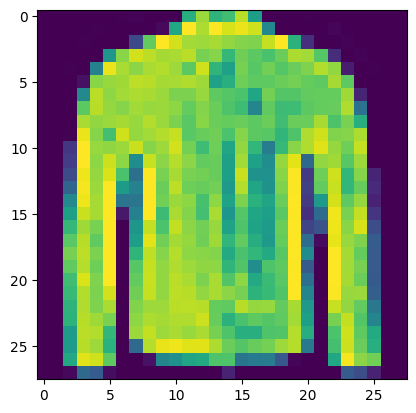

In [8]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

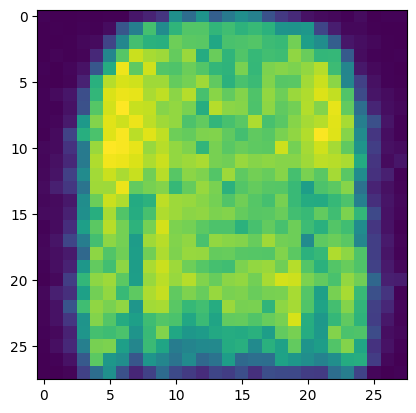

In [9]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

1. **Add one more hidden layer to autoencoder**

In [10]:

# this is our input placeholder
input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
469/469 [==============================] - 14s 27ms/step - loss: 0.3238 - accuracy: 0.0132 - val_loss: 0.2937 - val_accuracy: 0.0207
Epoch 2/5
469/469 [==============================] - 11s 24ms/step - loss: 0.2871 - accuracy: 0.0218 - val_loss: 0.2855 - val_accuracy: 0.0227
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2816 - accuracy: 0.0235 - val_loss: 0.2818 - val_accuracy: 0.0254
Epoch 4/5
469/469 [==============================] - 12s 26ms/step - loss: 0.2785 - accuracy: 0.0268 - val_loss: 0.2793 - val_accuracy: 0.0293
Epoch 5/5
469/469 [==============================] - 12s 25ms/step - loss: 0.2764 - accuracy: 0.0304 - val_loss: 0.2776 - val_accuracy: 0.0308


2. **Do the prediction on the test data and then visualize the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib**

In [11]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

313/313 [==============================] - 1s 4ms/step


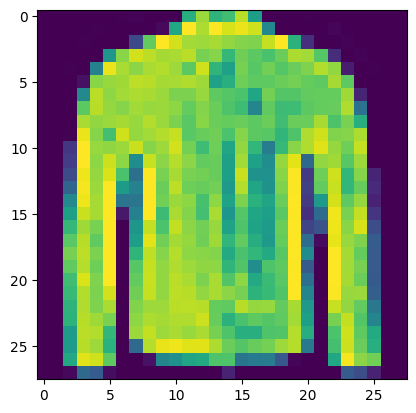

In [13]:

#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

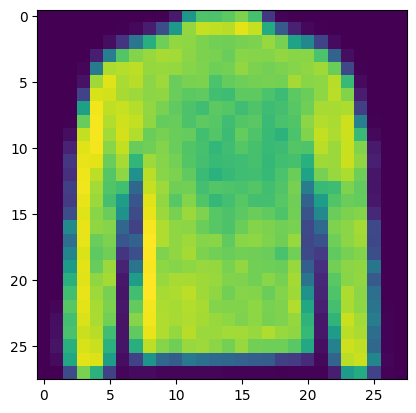

In [14]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()